In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.6.0


In [3]:
!nvidia-smi

Fri Oct 15 10:37:41 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#### 입력 이미지로 사용될 이미지 다운로드

In [4]:
!mkdir /content/data
!wget -O ./data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg

--2021-10-15 10:37:41--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383118 (374K) [image/jpeg]
Saving to: ‘./data/beatles01.jpg’

./data/beatles01.jp 100%[===================>] 374.14K  --.-KB/s    in 0.01s   

2021-10-15 10:37:41 (26.2 MB/s) - ‘./data/beatles01.jpg’ saved [383118/383118]



#### **TF Hub에서 SSD Inference 모델 다운로드 후 Inference 수행**

In [5]:
module_handle='https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2'
detector_model=hub.load(module_handle)

In [6]:
import cv2
import numpy as np
import time

img_array_np=cv2.imread('/content/data/beatles01.jpg')
img_array=img_array_np[np.newaxis,...]
print(img_array_np.shape,img_array.shape)

start_time=time.time()
result=detector_model(img_array)
print('elapsed time:',time.time()-start_time)

(633, 806, 3) (1, 633, 806, 3)
elapsed time: 31.334205627441406


In [7]:
#inference 결과 출력. dictionary 형태의 출력 결과. dict내부의 key는 model 별로 서로 다름. 출력하여 key값 확인 필요
print(result)

{'raw_detection_boxes': <tf.Tensor: shape=(1, 1917, 4), dtype=float32, numpy=
array([[[ 0.00631276,  0.00904142,  0.03609155,  0.0340144 ],
        [-0.00856351, -0.07280223,  0.06101339,  0.17188804],
        [-0.06701753, -0.02872824,  0.15511249,  0.09277533],
        ...,
        [ 0.2360721 , -0.05441427,  0.82106245,  1.050818  ],
        [-0.04293108,  0.19815394,  1.0614537 ,  0.8055974 ],
        [ 0.23631245,  0.02928028,  0.9821289 ,  0.9564253 ]]],
      dtype=float32)>, 'detection_scores': <tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[0.80172944, 0.7356188 , 0.7120171 , 0.69413865, 0.6636528 ,
        0.65565026, 0.6452407 , 0.603727  , 0.6026705 , 0.5842154 ,
        0.56527376, 0.5350405 , 0.5342654 , 0.5268757 , 0.52053607,
        0.5095628 , 0.4978297 , 0.4945502 , 0.4944435 , 0.4815372 ,
        0.4632207 , 0.44348982, 0.43932405, 0.43850383, 0.4356333 ,
        0.4294043 , 0.4046916 , 0.40248072, 0.4004219 , 0.38804975,
        0.379697  , 0.37923127, 0.

In [8]:
print(result.keys())

print(result['detection_boxes'].shape,result['detection_classes'].shape,result['num_detections'].shape,
      result['detection_scores'].shape)

dict_keys(['raw_detection_boxes', 'detection_scores', 'detection_multiclass_scores', 'num_detections', 'detection_boxes', 'raw_detection_scores', 'detection_anchor_indices', 'detection_classes'])
(1, 100, 4) (1, 100) (1,) (1, 100)


In [9]:
# detect된 object들은 detection score가 높은 순으로 array값을 순차적으로 채움. 
print('#### detection_classes #####')
print(result['detection_classes'])
print('#### detection_scores #####')
print(result['detection_scores'])

#### detection_classes #####
tf.Tensor(
[[ 1.  3.  1.  3.  3.  1.  3.  3.  3.  3.  3.  3.  1.  1.  3.  3.  3.  3.
   3.  1.  3.  8.  1.  4.  1.  3.  3.  3.  1.  1.  1.  1.  3.  1.  1.  1.
   1.  2.  1.  1. 41. 15. 15.  9.  1.  3.  3.  1.  1. 15.  4.  1.  1. 15.
   1. 28. 37.  8.  1.  3.  4. 10.  3.  8.  1.  1.  3.  1.  1. 31.  9.  3.
   1.  1.  8.  3.  1.  3.  1. 31. 15.  1. 31.  3.  1.  1.  3.  1.  1. 37.
   4. 10. 31. 31.  3.  1.  1.  8.  1. 34.]], shape=(1, 100), dtype=float32)
#### detection_scores #####
tf.Tensor(
[[0.80172944 0.7356188  0.7120171  0.69413865 0.6636528  0.65565026
  0.6452407  0.603727   0.6026705  0.5842154  0.56527376 0.5350405
  0.5342654  0.5268757  0.52053607 0.5095628  0.4978297  0.4945502
  0.4944435  0.4815372  0.4632207  0.44348982 0.43932405 0.43850383
  0.4356333  0.4294043  0.4046916  0.40248072 0.4004219  0.38804975
  0.379697   0.37923127 0.3572933  0.35150284 0.3513087  0.34515974
  0.34445184 0.3431205  0.3409394  0.3407754  0.33898056 0.33623496
 

In [10]:
#bounding box 좌표는 ymin,xmin,ymax,xmax 순서로 반환됨. y가 먼저. x가 나중에 나오므로 반드시 주의해야 함
#좌표 값은 원본 이미지의 width,height로 0~1 사이값으로 정규화됨
print('#### detection_boxes ####')
print(result['detection_boxes'])

#### detection_boxes ####
tf.Tensor(
[[[0.41495627 0.4789078  0.8861094  0.6805986 ]
  [0.35446185 0.6193308  0.45601124 0.7103389 ]
  [0.42462415 0.07202519 0.8726056  0.24962677]
  [0.34840307 0.57042307 0.4265056  0.6450172 ]
  [0.351907   0.49550375 0.37206447 0.51862085]
  [0.43273562 0.2820462  0.8654354  0.45395404]
  [0.3487833  0.5463882  0.37784773 0.5763231 ]
  [0.3735987  0.38559082 0.41415024 0.42749032]
  [0.3549313  0.45743853 0.3715493  0.4719668 ]
  [0.3873283  0.16212597 0.54663444 0.31490028]
  [0.35574898 0.53846586 0.41043958 0.595577  ]
  [0.35995895 0.74961007 0.4518572  0.80073214]
  [0.41962263 0.37767807 0.49098232 0.41628668]
  [0.40850347 0.6971656  0.8881627  0.8754239 ]
  [0.37630147 0.8410377  0.4158867  0.88230294]
  [0.3869046  0.8088866  0.42234337 0.8531973 ]
  [0.35546145 0.66919553 0.45342818 0.7328212 ]
  [0.33963862 0.5889446  0.3827575  0.64008945]
  [0.41962263 0.37767807 0.49098232 0.41628668]
  [0.39901894 0.7998833  0.5149196  0.85316366]
  [

#### inference결과를 이미지로 시각화

In [11]:
#result내의 value들을 모두 numpy로 변환.
result={key:value.numpy() for key,value in result.items()}

In [12]:
# 1부터 91까지의 COCO Class id 매핑. 
labels_to_names = {1:'person',2:'bicycle',3:'car',4:'motorcycle',5:'airplane',6:'bus',7:'train',8:'truck',9:'boat',10:'traffic light',
                    11:'fire hydrant',12:'street sign',13:'stop sign',14:'parking meter',15:'bench',16:'bird',17:'cat',18:'dog',19:'horse',20:'sheep',
                    21:'cow',22:'elephant',23:'bear',24:'zebra',25:'giraffe',26:'hat',27:'backpack',28:'umbrella',29:'shoe',30:'eye glasses',
                    31:'handbag',32:'tie',33:'suitcase',34:'frisbee',35:'skis',36:'snowboard',37:'sports ball',38:'kite',39:'baseball bat',40:'baseball glove',
                    41:'skateboard',42:'surfboard',43:'tennis racket',44:'bottle',45:'plate',46:'wine glass',47:'cup',48:'fork',49:'knife',50:'spoon',
                    51:'bowl',52:'banana',53:'apple',54:'sandwich',55:'orange',56:'broccoli',57:'carrot',58:'hot dog',59:'pizza',60:'donut',
                    61:'cake',62:'chair',63:'couch',64:'potted plant',65:'bed',66:'mirror',67:'dining table',68:'window',69:'desk',70:'toilet',
                    71:'door',72:'tv',73:'laptop',74:'mouse',75:'remote',76:'keyboard',77:'cell phone',78:'microwave',79:'oven',80:'toaster',
                    81:'sink',82:'refrigerator',83:'blender',84:'book',85:'clock',86:'vase',87:'scissors',88:'teddy bear',89:'hair drier',90:'toothbrush',
                    91:'hair brush'}

In [13]:
def get_ssd_detector(module_handle='https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2'):
  detector=hub.load(module_handle)
  return detector_model

detector_model=get_ssd_detector()

person:0.7767
person:0.7362
car:0.7209
person:0.7084
car:0.6868
person:0.6846
car:0.6652
car:0.6145
car:0.5854
car:0.5724
car:0.5606
car:0.5341
person:0.5228


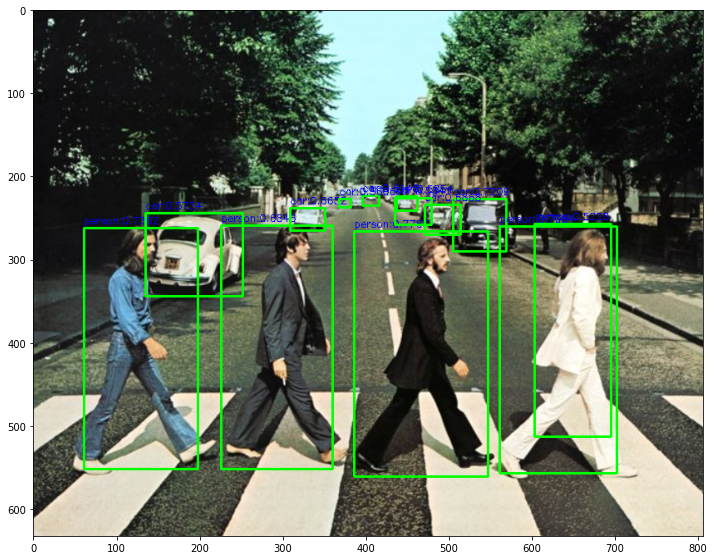

In [14]:
import cv2

img_array=cv2.cvtColor(cv2.imread('/content/data/beatles01.jpg'),cv2.COLOR_BGR2RGB)

height=img_array.shape[0]
width=img_array.shape[1]

draw_img=img_array.copy()

green_color=(0,255,0)
red_color=(0,0,255)

img_tensor=tf.convert_to_tensor(img_array,dtype=tf.uint8)[tf.newaxis,...]

result=detector_model(img_tensor)
result={key:value.numpy() for key,value in result.items()}

SCORE_THRESHOLD=0.5
OBJECT_DEFAULT_COUNT=100

for i in range(min(result['detection_scores'][0].shape[0],OBJECT_DEFAULT_COUNT)):
  score=result['detection_scores'][0,i]
  if score < SCORE_THRESHOLD:
    break
  box=result['detection_boxes'][0,i]

  left=box[1]*width
  top=box[0]*height
  right=box[3]*width
  bottom=box[2]*height

  class_id=result['detection_classes'][0,i]
  caption='{}:{:.4f}'.format(labels_to_names[class_id],score)
  print(caption)

  cv2.rectangle(draw_img,(int(left),int(top)),(int(right),int(bottom)),color=green_color, thickness=2)
  cv2.putText(draw_img, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red_color, 1)

plt.figure(figsize=(12, 12))
plt.imshow(draw_img)

In [32]:
import time
def get_detected_img(model,img_array,score_threshold,object_show_count=100,is_print=True):
  height=img_array.shape[0]
  width=img_array.shape[1]

  draw_img=img_array.copy()

  green_color=(0,255,0)
  red_color=(255,0,0)

  img_tensor=tf.convert_to_tensor(img_array,dtype=tf.uint8)[tf.newaxis,...]

  start_time=time.time()

  result=model(img_tensor)
  result={key:value.numpy() for key,value in result.items()}

  for i in range(min(result['detection_scores'][0].shape[0],object_show_count)):
    score=result['detection_scores'][0,i]
    if score < score_threshold:
      break
    
    box=result['detection_boxes'][0,i]

    left=box[1]*width
    top=box[0]*height
    right=box[3]*width
    bottom=box[2]*height

    class_id=result['detection_classes'][0,i]
    caption='{}:{:.4f}'.format(labels_to_names[class_id],score)

    cv2.rectangle(draw_img,(int(left),int(top)),(int(right),int(bottom)),color=green_color,thickness=2)
    cv2.putText(draw_img,caption,(int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red_color, 1)

    if is_print:
      print('Detection 수행시간:',round(time.time()-start_time,2),'초')

    return draw_img

#### **Video Inference 수행**

In [25]:
!wget -O ./data/Jonh_Wick_small.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/John_Wick_small.mp4?raw=true

--2021-10-15 11:03:28--  https://github.com/chulminkw/DLCV/blob/master/data/video/John_Wick_small.mp4?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/chulminkw/DLCV/raw/master/data/video/John_Wick_small.mp4 [following]
--2021-10-15 11:03:28--  https://github.com/chulminkw/DLCV/raw/master/data/video/John_Wick_small.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/John_Wick_small.mp4 [following]
--2021-10-15 11:03:29--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/John_Wick_small.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.

In [26]:
def do_detected_video(model,input_path,output_path,score_threshold,is_print):
  cap=cv2.VideoCapture(input_path)

  codec=cv2.VideoWriter_fourcc(*'XVID')

  vid_size=(round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
  vid_fps=cap.get(cv2.CAP_PROP_FPS)

  vid_writer = cv2.VideoWriter(output_path, codec, vid_fps, vid_size)

  frame_cnt=int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
  print('총 Frame 갯수:',frame_cnt)

  while True:
    hasFrame,img_frame=cap.read()
    if not hasFrame:
      print("더 이상 처리할 frame이 없습니다.")
      break
    
    img_frame=get_detected_img(model, img_frame, score_threshold=score_threshold, object_show_count=100, is_print=is_print)

    vid_writer.write(img_frame)

  vid_writer.release()
  cap.release()


In [33]:
do_detected_video(detector_model, '/content/data/Jonh_Wick_small.mp4', './data/John_Wick_small_02.mp4', 0.5, True)


총 Frame 갯수: 58
Detection 수행시간: 0.09 초
Detection 수행시간: 0.08 초
Detection 수행시간: 0.09 초
Detection 수행시간: 0.08 초
Detection 수행시간: 0.08 초
Detection 수행시간: 0.08 초
Detection 수행시간: 0.08 초
Detection 수행시간: 0.08 초
Detection 수행시간: 0.08 초
Detection 수행시간: 0.08 초
Detection 수행시간: 0.08 초
Detection 수행시간: 0.08 초
Detection 수행시간: 0.08 초
Detection 수행시간: 0.08 초
Detection 수행시간: 0.07 초
Detection 수행시간: 0.08 초
Detection 수행시간: 0.08 초
Detection 수행시간: 0.08 초
Detection 수행시간: 0.08 초
Detection 수행시간: 0.07 초
Detection 수행시간: 0.08 초
Detection 수행시간: 0.08 초
Detection 수행시간: 0.08 초
Detection 수행시간: 0.07 초
Detection 수행시간: 0.08 초
Detection 수행시간: 0.08 초
Detection 수행시간: 0.08 초
Detection 수행시간: 0.08 초
Detection 수행시간: 0.09 초
Detection 수행시간: 0.08 초
Detection 수행시간: 0.08 초
Detection 수행시간: 0.08 초
Detection 수행시간: 0.08 초
Detection 수행시간: 0.08 초
Detection 수행시간: 0.08 초
Detection 수행시간: 0.07 초
Detection 수행시간: 0.07 초
Detection 수행시간: 0.08 초
Detection 수행시간: 0.08 초
Detection 수행시간: 0.08 초
Detection 수행시간: 0.08 초
Detection 수행시간: 0.09 초
Detection 수행시간: 0.0